In [42]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM,Bidirectional,GRU
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
import datetime
import io
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

import sys
import os
# Obtener la ruta del directorio actual
os.chdir('/home/rgadea/experimentos_software_2024')
current_dir = os.getcwd()
print(current_dir)

# Construir la ruta relativa al directorio que quieres agregar
relative_dir = os.path.join(current_dir, 'mis_pkgs/')

# Agregar la ruta relativa al sys.path
sys.path.insert(0, relative_dir)

from MIOPATIA_db import DB_management as db 


/home/rgadea/experimentos_software_2024


Voy a quedarme con los 50 atunes P1 para obtener conjunto de training y validacion

In [43]:
!pwd


/home/rgadea/experimentos_software_2024


In [44]:
filename = "hdf_lomosP2_trainval_filtrado_def_good_ampliado_the_best7.hdf"
with pd.HDFStore(filename,complib="zlib",complevel=4) as hdf_db:
    pre_p_e1  = hdf_db.get('data/pollos_estado')
    pre_p_e1 = pre_p_e1.loc[pre_p_e1['Pollo'] != 0]
    # p_e =pre_p_e1.drop_duplicates(subset = ['Pollo', 'Medida'],  keep = 'last').reset_index(drop = True)
    t    = hdf_db.get('data/tabla')
    X_train=np.zeros((pre_p_e1.shape[0],220,8))
    y_train=np.zeros((pre_p_e1.shape[0],1))
    x=0
    for index, row in pre_p_e1.iterrows():   # El primer registro no se toma en cuenta porque es basura
        Primero = int(row['Primero'])
        Ultimo  = int(row['Ultimo'])
        estado  = int(row['Estado'])
        #print(Primero)
        #print(Ultimo)
        #print(estado)
        if estado == 0 or estado== 1:
            target = 1
        else:
            target = 0
        #target=estado
        pepito=np.array(t.iloc[Primero:Ultimo+1])
        # #print(pepito.shape)
        X_train[x]=pepito[:,3:11]
        #print(X_train[x][0:4,:])       
        y_train[x]=target
        y_train_to_categorical = to_categorical(y_train)
        x=x+1


# print(X_train.shape)
# print(y_train_to_categorical.shape)
# #print(X_train[0:4,:,:])
# #print(X_train[1][0:4][:])
# print(y_train[1:20])
# print(y_train_to_categorical[1:20])
# # #Aqui filtrariamos si hay filas que no nos interesan. En este caso dejo pasar todos los casos
# print(p_e)
# # X_train_filtrado = X_train[2:][:,:]
# # y_train_filtrado = y_train[2:]
X_train_filtrado = X_train
#y_train_filtrado = y_train
y_train_filtrado = y_train_to_categorical

# print(X_train_filtrado.shape)
# print(y_train_filtrado.shape)
# print(X_train_filtrado[0][:,:])
# # # Vamos a normalizar o escalar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
data_2d = X_train_filtrado.reshape(-1, X_train_filtrado.shape[-1])
normalized_data_2d = scaler.fit_transform(data_2d)
X_train_Normalizado=normalized_data_2d.reshape(X_train_filtrado.shape)
y_train_Normalizado=y_train_filtrado # los valores ya estaban normalizados
print(y_train_Normalizado.shape)

(3168, 2)


In [45]:
filename = "hdf_lomosP2_test_filtrado_def_good.hdf"
with pd.HDFStore(filename,complib="zlib",complevel=4) as hdf_db:
    pre_p_e1  = hdf_db.get('data/pollos_estado')
    pre_p_e1 = pre_p_e1.loc[pre_p_e1['Pollo'] != 0]
    pre_p_e1 =pre_p_e1.drop_duplicates(subset = ['Pollo', 'Medida'],  keep = 'last').reset_index(drop = True)
    t    = hdf_db.get('data/tabla')
    X_test=np.zeros((pre_p_e1.shape[0],220,8))
    y_test=np.zeros((pre_p_e1.shape[0],1))
    x=0
    for index, row in pre_p_e1.iterrows():   # El primer registro no se toma en cuenta porque es basura
        Primero = int(row['Primero'])
        Ultimo  = int(row['Ultimo'])
        estado  = int(row['Estado'])
        #print(Primero)
        #print(Ultimo)
        #print(estado)
        if estado == 0 or estado== 1:
           target = 1
        else:
           target = 0
        #target=estado
        pepito=np.array(t.iloc[Primero:Ultimo+1])
        # #print(pepito.shape)
        X_test[x]=pepito[:,3:11]
        #print(X_train[x][0:4,:])       
        y_test[x]=target
        y_test_to_categorical = to_categorical(y_test)
        x=x+1


# print(X_train.shape)
# print(y_train_to_categorical.shape)
# #print(X_train[0:4,:,:])
# #print(X_train[1][0:4][:])
# print(y_train[1:20])
# print(y_train_to_categorical[1:20])
# # #Aqui filtrariamos si hay filas que no nos interesan. En este caso dejo pasar todos los casos
# print(p_e)
# # X_train_filtrado = X_train[2:][:,:]
# # y_train_filtrado = y_train[2:]
X_test_filtrado = X_test
#y_train_filtrado = y_train
y_test_filtrado = y_test_to_categorical

print(X_test_filtrado.shape)
print(y_test_filtrado.shape)
# print(X_train_filtrado[0][:,:])
# # # Vamos a normalizar o escalar los datos
# concatenamos train y test
#X_total=np.concatenate((X_train_filtrado,X_test_filtrado),axis=0)
#scaler = MinMaxScaler(feature_range=(0, 1))
#data_2d_test = X_total.reshape(-1, X_total.shape[-1])
data_2d_test = X_test_filtrado.reshape(-1, X_test_filtrado.shape[-1])
normalized_data_2d_test = scaler.transform(data_2d_test)


X_test_def=normalized_data_2d_test.reshape(X_test_filtrado.shape) 
# la alternativa es normalizar con el total
# X_test_def=normalized_data_2d_test.reshape(X_test_filtrado.shape) 

y_test_def=y_test_filtrado # los valores ya estaban normalizados
print(X_test_def[0])

(89, 220, 8)
(89, 2)
[[1.45375657e-01 4.74795267e-01 2.80281244e-02 ... 5.25204733e-01
  1.45375842e-01 6.87729402e-01]
 [1.04024516e-01 4.57433188e-01 2.91808316e-02 ... 5.42566812e-01
  1.04024006e-01 6.97578524e-01]
 [8.71835342e-02 4.33210717e-01 3.04208802e-02 ... 5.66789283e-01
  8.71821912e-02 6.95625305e-01]
 ...
 [2.02802467e-04 3.24435285e-01 2.62623498e-02 ... 6.75564715e-01
  2.02784951e-04 7.57016975e-01]
 [1.94554576e-04 3.21521964e-01 2.62630472e-02 ... 6.78478036e-01
  1.94537255e-04 7.57024384e-01]
 [1.86099353e-04 3.17958187e-01 2.62645389e-02 ... 6.82041813e-01
  1.86082165e-04 7.57031614e-01]]


Vamos a hacer los conjuntos de entrenamiento validacion y test

In [46]:
# Divide el dataset en entrenamiento y temporal (test+validación)
# X_temp, X_test_def, y_temp, y_test_def = train_test_split(X_train_Normalizado, y_train_Normalizado, test_size=0.2, stratify=y_train_Normalizado, random_state=42)

# Divide el dataset temporal en validación y test
X_train_def, X_val_def, y_train_def, y_val_def = train_test_split(X_train_Normalizado, y_train_Normalizado, test_size=0.25, stratify=y_train_Normalizado, random_state=42)

# Ahora, X_train, X_val y X_test contienen los datos de entrada para los conjuntos de entrenamiento, validación y prueba, respectivamente.
# y_train, y_val y y_test contienen las clases correspondientes.

In [47]:
print(X_train_def.shape)
print(X_val_def.shape)
print(X_test_def.shape)
print(y_train_def.shape)
print(y_val_def.shape)
print(y_test_def.shape)

(2376, 220, 8)
(792, 220, 8)
(89, 220, 8)
(2376, 2)
(792, 2)
(89, 2)


In [48]:
%load_ext tensorboard

#%tensorboard --logdir logs
#log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [49]:
def plot_to_image(figure):
    """
    Converts the matplotlib plot specified by 'figure' to a PNG image and
    returns it. The supplied figure is closed and inaccessible after this call.
    """
    
    buf = io.BytesIO()
    
    # Use plt.savefig to save the plot to a PNG in memory.
    plt.savefig(buf, format='png')
    
    # Closing the figure prevents it from being displayed directly inside
    # the notebook.
    plt.close(figure)
    buf.seek(0)
    
    # Use tf.image.decode_png to convert the PNG buffer
    # to a TF image. Make sure you use 4 channels.
    image = tf.image.decode_png(buf.getvalue(), channels=4)
    
    # Use tf.expand_dims to add the batch dimension
    image = tf.expand_dims(image, 0)
    
    return image

In [50]:
def plot_confusion_matrix(cm, class_names):
    """
    Returns a matplotlib figure containing the plotted confusion matrix.
    
    Args:
       cm (array, shape = [n, n]): a confusion matrix of integer classes
       class_names (array, shape = [n]): String names of the integer classes
    """
    
    figure = plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    
    # Normalize the confusion matrix.
    cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
    
    # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.
    threshold = 0.5
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "red" if cm[i, j] > threshold else "black"
        plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return figure

In [51]:
factor_aprendizaje=0.001
dimension_LSTM=50
dimension_dense=50
algoritmo='RMSprop'
supermax=8*4
lossfunction='categorical_crossentropy'
def create_model():

    model = Sequential()
    model.add(GRU(dimension_LSTM, return_sequences=False,input_shape=(220, 8)))
    #model.add(Bidirectional(LSTM(50, return_sequences=True)))
    #model.add(Bidirectional(LSTM(50, return_sequences=True)))
    #model.add(Bidirectional(LSTM(50, return_sequences=False)))
    model.add(Dense(dimension_dense, activation='tanh'))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss=lossfunction, optimizer=algoritmo, metrics=['accuracy'])
    model.optimizer.lr=(factor_aprendizaje)
    return model

model=create_model()

In [52]:

experimento="LOMOS_P2yP1_GRU2_2_clasesfiltrado_{}_dense_onehot_{}_loss_{}_lr_{}_algoritmo_{}".format(dimension_LSTM,dimension_dense,lossfunction,factor_aprendizaje,algoritmo)
logdir="./logs/defs/{}_{}".format(experimento,datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)
file_writer_cm = tf.summary.create_file_writer(logdir + '/cm')


In [53]:
class_names=["Buenos","Malos"]

In [54]:
def log_confusion_matrix(epoch, logs):
    
    # Use the model to predict the values from the test_images.
    y_pred = model.predict(X_test_def)
    #y_pred1=y_pred[:,-1]
    y_pred2=y_pred.argmax(axis=1)
    #y_pred2=np.where(y_pred>0,1,0)
    #y_pred2=y_pred2[:,-1]
    #classes = [0, 1, 2, 3, 4] 
    classes = [0, 1]
    y_test_def2=np.argmax(y_test_def,axis=1)  
    #y_test_def2=np.where(y_test_def>0,1,0)
    cm=confusion_matrix(y_test_def2, y_pred2,labels=classes)
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    figura = plot_confusion_matrix(cm, class_names=class_names)
    cm_image = plot_to_image(figura)
    
    # Log the confusion matrix as an image summary.
    with file_writer_cm.as_default():
        tf.summary.image("Confusion Matrix", cm_image, step=epoch)

In [55]:
cm_callback = tf.keras.callbacks.LambdaCallback(on_epoch_end=log_confusion_matrix)
print(y_train_Normalizado.shape)
print(y_val_def.shape)

(3168, 2)
(792, 2)


In [56]:
# Crear un callback para guardar los mejores pesos
checkpoint = tf.keras.callbacks.ModelCheckpoint('best_weights.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')


In [57]:
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=500, verbose=2, mode='auto', baseline=None, restore_best_weights=True)
model.fit(X_train_Normalizado, y_train_Normalizado, epochs=400, batch_size=20, callbacks=[tensorboard_callback,cm_callback,checkpoint, early_stop], validation_data=(X_val_def, y_val_def))
# Final evaluation of the model 
scores = model.evaluate(X_test_def, y_test_def, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/400
3/3 [==============================] - 0s 21ms/step- loss: 0.6895 - accuracy: 0.55

Epoch 1: val_loss improved from inf to 0.68256, saving model to best_weights.h5
159/159 [==============================] - 16s 89ms/step - loss: 0.6895 - accuracy: 0.5556 - val_loss: 0.6826 - val_accuracy: 0.5631
Epoch 2/400
  2/159 [..............................] - ETA: 12s - loss: 0.6981 - accuracy: 0.5000

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 23ms/step- loss: 0.6858 - accuracy: 0.56

Epoch 2: val_loss improved from 0.68256 to 0.68029, saving model to best_weights.h5
159/159 [==============================] - 13s 84ms/step - loss: 0.6858 - accuracy: 0.5628 - val_loss: 0.6803 - val_accuracy: 0.5631
Epoch 3/400
  2/159 [..............................] - ETA: 11s - loss: 0.6762 - accuracy: 0.5750

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 20ms/step- loss: 0.6843 - accuracy: 0.56

Epoch 3: val_loss improved from 0.68029 to 0.67924, saving model to best_weights.h5
159/159 [==============================] - 13s 83ms/step - loss: 0.6843 - accuracy: 0.5644 - val_loss: 0.6792 - val_accuracy: 0.5783
Epoch 4/400
  2/159 [..............................] - ETA: 11s - loss: 0.6668 - accuracy: 0.6750

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 23ms/step- loss: 0.6840 - accuracy: 0.56

Epoch 4: val_loss improved from 0.67924 to 0.67736, saving model to best_weights.h5
159/159 [==============================] - 13s 85ms/step - loss: 0.6840 - accuracy: 0.5679 - val_loss: 0.6774 - val_accuracy: 0.5821
Epoch 5/400
  2/159 [..............................] - ETA: 13s - loss: 0.7006 - accuracy: 0.5500

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 20ms/step- loss: 0.6833 - accuracy: 0.57

Epoch 5: val_loss did not improve from 0.67736
159/159 [==============================] - 13s 83ms/step - loss: 0.6833 - accuracy: 0.5739 - val_loss: 0.6779 - val_accuracy: 0.5783
Epoch 6/400
3/3 [==============================] - 0s 23ms/step- loss: 0.6834 - accuracy: 0.57

Epoch 6: val_loss did not improve from 0.67736
159/159 [==============================] - 13s 82ms/step - loss: 0.6834 - accuracy: 0.5723 - val_loss: 0.6777 - val_accuracy: 0.5859
Epoch 7/400
3/3 [==============================] - 0s 23ms/step- loss: 0.6832 - accuracy: 0.57

Epoch 7: val_loss did not improve from 0.67736
159/159 [==============================] - 13s 83ms/step - loss: 0.6832 - accuracy: 0.5732 - val_loss: 0.6778 - val_accuracy: 0.5871
Epoch 8/400
3/3 [==============================] - 0s 23ms/step- loss: 0.6824 - accuracy: 0.57

Epoch 8: val_loss did not improve from 0.67736
159/159 [==============================] 

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 21ms/step- loss: 0.6816 - accuracy: 0.57

Epoch 12: val_loss did not improve from 0.67601
159/159 [==============================] - 14s 85ms/step - loss: 0.6816 - accuracy: 0.5764 - val_loss: 0.6765 - val_accuracy: 0.5694
Epoch 13/400
3/3 [==============================] - 0s 18ms/step- loss: 0.6816 - accuracy: 0.57

Epoch 13: val_loss improved from 0.67601 to 0.67433, saving model to best_weights.h5
159/159 [==============================] - 14s 85ms/step - loss: 0.6816 - accuracy: 0.5777 - val_loss: 0.6743 - val_accuracy: 0.5934
Epoch 14/400
  2/159 [..............................] - ETA: 10s - loss: 0.7492 - accuracy: 0.3500

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 19ms/step- loss: 0.6817 - accuracy: 0.57

Epoch 14: val_loss did not improve from 0.67433
159/159 [==============================] - 13s 85ms/step - loss: 0.6817 - accuracy: 0.5726 - val_loss: 0.6778 - val_accuracy: 0.5770
Epoch 15/400
3/3 [==============================] - 0s 20ms/step- loss: 0.6822 - accuracy: 0.58

Epoch 15: val_loss did not improve from 0.67433
159/159 [==============================] - 13s 81ms/step - loss: 0.6822 - accuracy: 0.5818 - val_loss: 0.6759 - val_accuracy: 0.6199
Epoch 16/400
3/3 [==============================] - 0s 25ms/step- loss: 0.6815 - accuracy: 0.57

Epoch 16: val_loss did not improve from 0.67433
159/159 [==============================] - 14s 87ms/step - loss: 0.6815 - accuracy: 0.5789 - val_loss: 0.6785 - val_accuracy: 0.5783
Epoch 17/400
3/3 [==============================] - 0s 21ms/step- loss: 0.6819 - accuracy: 0.57

Epoch 17: val_loss did not improve from 0.67433
159/159 [=========================

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 21ms/step- loss: 0.6809 - accuracy: 0.57

Epoch 19: val_loss did not improve from 0.67267
159/159 [==============================] - 13s 83ms/step - loss: 0.6809 - accuracy: 0.5795 - val_loss: 0.6762 - val_accuracy: 0.6111
Epoch 20/400
3/3 [==============================] - 0s 22ms/step- loss: 0.6810 - accuracy: 0.57

Epoch 20: val_loss did not improve from 0.67267
159/159 [==============================] - 13s 81ms/step - loss: 0.6810 - accuracy: 0.5773 - val_loss: 0.6759 - val_accuracy: 0.5593
Epoch 21/400
3/3 [==============================] - 0s 19ms/step- loss: 0.6818 - accuracy: 0.57

Epoch 21: val_loss did not improve from 0.67267
159/159 [==============================] - 13s 83ms/step - loss: 0.6818 - accuracy: 0.5799 - val_loss: 0.6747 - val_accuracy: 0.6048
Epoch 22/400
3/3 [==============================] - 0s 20ms/step- loss: 0.6808 - accuracy: 0.58

Epoch 22: val_loss did not improve from 0.67267
159/159 [=========================

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 24ms/step- loss: 0.6816 - accuracy: 0.58

Epoch 24: val_loss did not improve from 0.67265
159/159 [==============================] - 13s 82ms/step - loss: 0.6816 - accuracy: 0.5824 - val_loss: 0.6734 - val_accuracy: 0.5947
Epoch 25/400
3/3 [==============================] - 0s 21ms/step- loss: 0.6829 - accuracy: 0.57

Epoch 25: val_loss improved from 0.67265 to 0.67055, saving model to best_weights.h5
159/159 [==============================] - 13s 82ms/step - loss: 0.6829 - accuracy: 0.5758 - val_loss: 0.6705 - val_accuracy: 0.6098
Epoch 26/400
  2/159 [..............................] - ETA: 11s - loss: 0.6586 - accuracy: 0.6500

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 24ms/step- loss: 0.6795 - accuracy: 0.58

Epoch 26: val_loss did not improve from 0.67055
159/159 [==============================] - 13s 84ms/step - loss: 0.6795 - accuracy: 0.5802 - val_loss: 0.6717 - val_accuracy: 0.5934
Epoch 27/400
3/3 [==============================] - 0s 23ms/step- loss: 0.6814 - accuracy: 0.57

Epoch 27: val_loss did not improve from 0.67055
159/159 [==============================] - 13s 84ms/step - loss: 0.6814 - accuracy: 0.5729 - val_loss: 0.6728 - val_accuracy: 0.5922
Epoch 28/400
3/3 [==============================] - 0s 20ms/step- loss: 0.6786 - accuracy: 0.58

Epoch 28: val_loss improved from 0.67055 to 0.66918, saving model to best_weights.h5
159/159 [==============================] - 13s 84ms/step - loss: 0.6786 - accuracy: 0.5808 - val_loss: 0.6692 - val_accuracy: 0.5871
Epoch 29/400
  2/159 [..............................] - ETA: 11s - loss: 0.7389 - accuracy: 0.4750

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 18ms/step- loss: 0.6808 - accuracy: 0.57

Epoch 29: val_loss did not improve from 0.66918
159/159 [==============================] - 13s 81ms/step - loss: 0.6808 - accuracy: 0.5713 - val_loss: 0.6703 - val_accuracy: 0.5808
Epoch 30/400
3/3 [==============================] - 0s 22ms/step- loss: 0.6821 - accuracy: 0.57

Epoch 30: val_loss did not improve from 0.66918
159/159 [==============================] - 13s 83ms/step - loss: 0.6821 - accuracy: 0.5717 - val_loss: 0.6732 - val_accuracy: 0.5770
Epoch 31/400
3/3 [==============================] - 0s 21ms/step- loss: 0.6784 - accuracy: 0.57

Epoch 31: val_loss did not improve from 0.66918
159/159 [==============================] - 13s 84ms/step - loss: 0.6784 - accuracy: 0.5770 - val_loss: 0.6711 - val_accuracy: 0.5821
Epoch 32/400
3/3 [==============================] - 0s 24ms/step- loss: 0.6815 - accuracy: 0.57

Epoch 32: val_loss improved from 0.66918 to 0.66886, saving model to best_weights.

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 23ms/step- loss: 0.6787 - accuracy: 0.57

Epoch 33: val_loss did not improve from 0.66886
159/159 [==============================] - 13s 83ms/step - loss: 0.6787 - accuracy: 0.5789 - val_loss: 0.6758 - val_accuracy: 0.5657
Epoch 34/400
3/3 [==============================] - 0s 23ms/step- loss: 0.6781 - accuracy: 0.57

Epoch 34: val_loss did not improve from 0.66886
159/159 [==============================] - 14s 88ms/step - loss: 0.6781 - accuracy: 0.5773 - val_loss: 0.6712 - val_accuracy: 0.5922
Epoch 35/400
3/3 [==============================] - 0s 22ms/step- loss: 0.6804 - accuracy: 0.57

Epoch 35: val_loss improved from 0.66886 to 0.66873, saving model to best_weights.h5
159/159 [==============================] - 13s 84ms/step - loss: 0.6804 - accuracy: 0.5723 - val_loss: 0.6687 - val_accuracy: 0.5821
Epoch 36/400
  2/159 [..............................] - ETA: 11s - loss: 0.6608 - accuracy: 0.6250

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 22ms/step- loss: 0.6780 - accuracy: 0.57

Epoch 36: val_loss improved from 0.66873 to 0.66838, saving model to best_weights.h5
159/159 [==============================] - 13s 84ms/step - loss: 0.6780 - accuracy: 0.5780 - val_loss: 0.6684 - val_accuracy: 0.6149
Epoch 37/400
  2/159 [..............................] - ETA: 11s - loss: 0.6576 - accuracy: 0.6500

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 21ms/step- loss: 0.6848 - accuracy: 0.57

Epoch 37: val_loss did not improve from 0.66838
159/159 [==============================] - 13s 83ms/step - loss: 0.6848 - accuracy: 0.5754 - val_loss: 0.6692 - val_accuracy: 0.5821
Epoch 38/400
3/3 [==============================] - 0s 19ms/step- loss: 0.6849 - accuracy: 0.57

Epoch 38: val_loss did not improve from 0.66838
159/159 [==============================] - 13s 81ms/step - loss: 0.6849 - accuracy: 0.5786 - val_loss: 0.6782 - val_accuracy: 0.5821
Epoch 39/400
3/3 [==============================] - 0s 19ms/step- loss: 0.6779 - accuracy: 0.58

Epoch 39: val_loss improved from 0.66838 to 0.66735, saving model to best_weights.h5
159/159 [==============================] - 13s 83ms/step - loss: 0.6779 - accuracy: 0.5814 - val_loss: 0.6674 - val_accuracy: 0.5821
Epoch 40/400
  2/159 [..............................] - ETA: 11s - loss: 0.6946 - accuracy: 0.5750

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 20ms/step- loss: 0.6808 - accuracy: 0.57

Epoch 40: val_loss did not improve from 0.66735
159/159 [==============================] - 13s 84ms/step - loss: 0.6808 - accuracy: 0.5764 - val_loss: 0.6716 - val_accuracy: 0.5972
Epoch 41/400
3/3 [==============================] - 0s 23ms/step- loss: 0.6788 - accuracy: 0.57

Epoch 41: val_loss did not improve from 0.66735
159/159 [==============================] - 13s 84ms/step - loss: 0.6788 - accuracy: 0.5799 - val_loss: 0.6724 - val_accuracy: 0.6149
Epoch 42/400
3/3 [==============================] - 0s 22ms/step- loss: 0.6769 - accuracy: 0.60

Epoch 42: val_loss did not improve from 0.66735
159/159 [==============================] - 13s 82ms/step - loss: 0.6769 - accuracy: 0.6007 - val_loss: 0.6749 - val_accuracy: 0.5682
Epoch 43/400
3/3 [==============================] - 0s 22ms/step- loss: 0.6778 - accuracy: 0.58

Epoch 43: val_loss did not improve from 0.66735
159/159 [=========================

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 23ms/step- loss: 0.6798 - accuracy: 0.59

Epoch 45: val_loss did not improve from 0.66717
159/159 [==============================] - 13s 82ms/step - loss: 0.6798 - accuracy: 0.5919 - val_loss: 0.6789 - val_accuracy: 0.6174
Epoch 46/400
3/3 [==============================] - 0s 20ms/step- loss: 0.6817 - accuracy: 0.59

Epoch 46: val_loss did not improve from 0.66717
159/159 [==============================] - 13s 82ms/step - loss: 0.6817 - accuracy: 0.5903 - val_loss: 0.6844 - val_accuracy: 0.6010
Epoch 47/400
3/3 [==============================] - 0s 22ms/step- loss: 0.6737 - accuracy: 0.60

Epoch 47: val_loss improved from 0.66717 to 0.66027, saving model to best_weights.h5
159/159 [==============================] - 13s 82ms/step - loss: 0.6737 - accuracy: 0.6004 - val_loss: 0.6603 - val_accuracy: 0.6124
Epoch 48/400
  2/159 [..............................] - ETA: 9s - loss: 0.6500 - accuracy: 0.6000 

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 25ms/step- loss: 0.6825 - accuracy: 0.57

Epoch 48: val_loss did not improve from 0.66027
159/159 [==============================] - 13s 83ms/step - loss: 0.6825 - accuracy: 0.5742 - val_loss: 0.6683 - val_accuracy: 0.5997
Epoch 49/400
3/3 [==============================] - 0s 23ms/step- loss: 0.6826 - accuracy: 0.58

Epoch 49: val_loss did not improve from 0.66027
159/159 [==============================] - 13s 84ms/step - loss: 0.6826 - accuracy: 0.5855 - val_loss: 0.7247 - val_accuracy: 0.4533
Epoch 50/400
3/3 [==============================] - 0s 19ms/step- loss: 0.6894 - accuracy: 0.55

Epoch 50: val_loss did not improve from 0.66027
159/159 [==============================] - 13s 82ms/step - loss: 0.6894 - accuracy: 0.5552 - val_loss: 0.6813 - val_accuracy: 0.5631
Epoch 51/400
3/3 [==============================] - 0s 20ms/step- loss: 0.6853 - accuracy: 0.55

Epoch 51: val_loss did not improve from 0.66027
159/159 [=========================

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 22ms/step- loss: 0.6824 - accuracy: 0.57

Epoch 57: val_loss did not improve from 0.65554
159/159 [==============================] - 13s 82ms/step - loss: 0.6824 - accuracy: 0.5767 - val_loss: 0.6839 - val_accuracy: 0.5783
Epoch 58/400
3/3 [==============================] - 0s 21ms/step- loss: 0.6879 - accuracy: 0.56

Epoch 58: val_loss did not improve from 0.65554
159/159 [==============================] - 14s 86ms/step - loss: 0.6879 - accuracy: 0.5616 - val_loss: 0.6838 - val_accuracy: 0.5783
Epoch 59/400
3/3 [==============================] - 0s 24ms/step- loss: 0.6816 - accuracy: 0.56

Epoch 59: val_loss did not improve from 0.65554
159/159 [==============================] - 13s 84ms/step - loss: 0.6816 - accuracy: 0.5682 - val_loss: 0.6790 - val_accuracy: 0.5694
Epoch 60/400
3/3 [==============================] - 0s 22ms/step- loss: 0.6786 - accuracy: 0.56

Epoch 60: val_loss did not improve from 0.65554
159/159 [=========================

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 23ms/step- loss: 0.6576 - accuracy: 0.61

Epoch 80: val_loss did not improve from 0.65378
159/159 [==============================] - 13s 83ms/step - loss: 0.6576 - accuracy: 0.6143 - val_loss: 0.7009 - val_accuracy: 0.5871
Epoch 81/400
3/3 [==============================] - 0s 21ms/step- loss: 0.6622 - accuracy: 0.60

Epoch 81: val_loss did not improve from 0.65378
159/159 [==============================] - 14s 85ms/step - loss: 0.6622 - accuracy: 0.6092 - val_loss: 0.6633 - val_accuracy: 0.6162
Epoch 82/400
3/3 [==============================] - 0s 23ms/step- loss: 0.6585 - accuracy: 0.60

Epoch 82: val_loss did not improve from 0.65378
159/159 [==============================] - 14s 86ms/step - loss: 0.6585 - accuracy: 0.6076 - val_loss: 0.6603 - val_accuracy: 0.6275
Epoch 83/400
3/3 [==============================] - 0s 24ms/step- loss: 0.6544 - accuracy: 0.62

Epoch 83: val_loss did not improve from 0.65378
159/159 [=========================

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 24ms/step- loss: 0.6460 - accuracy: 0.61

Epoch 86: val_loss improved from 0.65101 to 0.63052, saving model to best_weights.h5
159/159 [==============================] - 13s 83ms/step - loss: 0.6460 - accuracy: 0.6114 - val_loss: 0.6305 - val_accuracy: 0.6061
Epoch 87/400
  2/159 [..............................] - ETA: 12s - loss: 0.6662 - accuracy: 0.4750

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 20ms/step- loss: 0.6630 - accuracy: 0.59

Epoch 87: val_loss did not improve from 0.63052
159/159 [==============================] - 13s 82ms/step - loss: 0.6630 - accuracy: 0.5963 - val_loss: 0.6633 - val_accuracy: 0.5240
Epoch 88/400
3/3 [==============================] - 0s 24ms/step- loss: 0.6491 - accuracy: 0.60

Epoch 88: val_loss did not improve from 0.63052
159/159 [==============================] - 13s 84ms/step - loss: 0.6491 - accuracy: 0.6073 - val_loss: 0.6527 - val_accuracy: 0.5682
Epoch 89/400
3/3 [==============================] - 0s 26ms/step- loss: 0.6634 - accuracy: 0.

Epoch 89: val_loss improved from 0.63052 to 0.62986, saving model to best_weights.h5
159/159 [==============================] - 13s 83ms/step - loss: 0.6634 - accuracy: 0.5887 - val_loss: 0.6299 - val_accuracy: 0.6187
Epoch 90/400
  2/159 [..............................] - ETA: 11s - loss: 0.5644 - accuracy: 0.7750

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 22ms/step- loss: 0.6834 - accuracy: 0.57

Epoch 90: val_loss did not improve from 0.62986
159/159 [==============================] - 13s 83ms/step - loss: 0.6834 - accuracy: 0.5777 - val_loss: 0.6794 - val_accuracy: 0.5770
Epoch 91/400
3/3 [==============================] - 0s 21ms/step- loss: 0.6781 - accuracy: 0.56

Epoch 91: val_loss did not improve from 0.62986
159/159 [==============================] - 13s 82ms/step - loss: 0.6781 - accuracy: 0.5688 - val_loss: 0.6629 - val_accuracy: 0.5606
Epoch 92/400
3/3 [==============================] - 0s 21ms/step- loss: 0.6672 - accuracy: 0.59

Epoch 92: val_loss did not improve from 0.62986
159/159 [==============================] - 14s 86ms/step - loss: 0.6672 - accuracy: 0.5944 - val_loss: 0.6708 - val_accuracy: 0.5202
Epoch 93/400
3/3 [==============================] - 0s 25ms/step- loss: 0.6697 - accuracy: 0.

Epoch 93: val_loss did not improve from 0.62986
159/159 [===========================

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 21ms/step- loss: 0.6201 - accuracy: 0.64

Epoch 101: val_loss improved from 0.60257 to 0.59210, saving model to best_weights.h5
159/159 [==============================] - 13s 83ms/step - loss: 0.6201 - accuracy: 0.6468 - val_loss: 0.5921 - val_accuracy: 0.7058
Epoch 102/400
  2/159 [..............................] - ETA: 12s - loss: 0.6162 - accuracy: 0.7000

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 20ms/step- loss: 0.6208 - accuracy: 0.64

Epoch 102: val_loss did not improve from 0.59210
159/159 [==============================] - 14s 86ms/step - loss: 0.6208 - accuracy: 0.6439 - val_loss: 0.6222 - val_accuracy: 0.6553
Epoch 103/400
3/3 [==============================] - 0s 22ms/step- loss: 0.6203 - accuracy: 0.64

Epoch 103: val_loss did not improve from 0.59210
159/159 [==============================] - 13s 81ms/step - loss: 0.6203 - accuracy: 0.6436 - val_loss: 0.6198 - val_accuracy: 0.6806
Epoch 104/400
3/3 [==============================] - 0s 24ms/step- loss: 0.6173 - accuracy: 0.64

Epoch 104: val_loss did not improve from 0.59210
159/159 [==============================] - 13s 85ms/step - loss: 0.6173 - accuracy: 0.6499 - val_loss: 0.5933 - val_accuracy: 0.6768
Epoch 105/400
3/3 [==============================] - 0s 20ms/step- loss: 0.6455 - accuracy: 0.63

Epoch 105: val_loss did not improve from 0.59210
159/159 [==================

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 21ms/step- loss: 0.5980 - accuracy: 0.67

Epoch 121: val_loss improved from 0.57534 to 0.56439, saving model to best_weights.h5
159/159 [==============================] - 13s 83ms/step - loss: 0.5980 - accuracy: 0.6755 - val_loss: 0.5644 - val_accuracy: 0.7652
Epoch 122/400
  2/159 [..............................] - ETA: 11s - loss: 0.5382 - accuracy: 0.7250

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 22ms/step- loss: 0.6069 - accuracy: 0.65

Epoch 122: val_loss did not improve from 0.56439
159/159 [==============================] - 13s 83ms/step - loss: 0.6069 - accuracy: 0.6585 - val_loss: 0.5983 - val_accuracy: 0.6503
Epoch 123/400
3/3 [==============================] - 0s 21ms/step- loss: 0.6497 - accuracy: 0.62

Epoch 123: val_loss did not improve from 0.56439
159/159 [==============================] - 13s 82ms/step - loss: 0.6497 - accuracy: 0.6241 - val_loss: 0.6618 - val_accuracy: 0.5492
Epoch 124/400
3/3 [==============================] - 0s 24ms/step- loss: 0.6696 - accuracy: 0.57

Epoch 124: val_loss did not improve from 0.56439
159/159 [==============================] - 13s 84ms/step - loss: 0.6696 - accuracy: 0.5780 - val_loss: 0.6543 - val_accuracy: 0.6288
Epoch 125/400
3/3 [==============================] - 0s 19ms/step- loss: 0.6568 - accuracy: 0.59

Epoch 125: val_loss did not improve from 0.56439
159/159 [==================

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 22ms/step- loss: 0.5702 - accuracy: 0.70

Epoch 132: val_loss did not improve from 0.53883
159/159 [==============================] - 14s 88ms/step - loss: 0.5702 - accuracy: 0.7004 - val_loss: 0.5768 - val_accuracy: 0.6970
Epoch 133/400
3/3 [==============================] - 0s 22ms/step- loss: 0.5848 - accuracy: 0.69

Epoch 133: val_loss did not improve from 0.53883
159/159 [==============================] - 14s 85ms/step - loss: 0.5848 - accuracy: 0.6926 - val_loss: 0.6145 - val_accuracy: 0.6806
Epoch 134/400
3/3 [==============================] - 0s 22ms/step- loss: 0.5591 - accuracy: 0.70

Epoch 134: val_loss improved from 0.53883 to 0.52292, saving model to best_weights.h5
159/159 [==============================] - 14s 86ms/step - loss: 0.5591 - accuracy: 0.7014 - val_loss: 0.5229 - val_accuracy: 0.7677
Epoch 135/400
  2/159 [..............................] - ETA: 11s - loss: 0.4111 - accuracy: 0.9000

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 22ms/step- loss: 0.5460 - accuracy: 0.71

Epoch 135: val_loss did not improve from 0.52292
159/159 [==============================] - 13s 83ms/step - loss: 0.5460 - accuracy: 0.7102 - val_loss: 0.5282 - val_accuracy: 0.7689
Epoch 136/400
3/3 [==============================] - 0s 21ms/step- loss: 0.5590 - accuracy: 0.70

Epoch 136: val_loss did not improve from 0.52292
159/159 [==============================] - 13s 84ms/step - loss: 0.5590 - accuracy: 0.7027 - val_loss: 0.5699 - val_accuracy: 0.6818
Epoch 137/400
3/3 [==============================] - 0s 20ms/step- loss: 0.5498 - accuracy: 0.70

Epoch 137: val_loss did not improve from 0.52292
159/159 [==============================] - 13s 83ms/step - loss: 0.5498 - accuracy: 0.7001 - val_loss: 0.5231 - val_accuracy: 0.7576
Epoch 138/400
3/3 [==============================] - 0s 20ms/step- loss: 0.5421 - accuracy: 0.71

Epoch 138: val_loss did not improve from 0.52292
159/159 [==================

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 22ms/step- loss: 0.5469 - accuracy: 0.71

Epoch 141: val_loss did not improve from 0.50735
159/159 [==============================] - 13s 83ms/step - loss: 0.5469 - accuracy: 0.7128 - val_loss: 0.5717 - val_accuracy: 0.7172
Epoch 142/400
3/3 [==============================] - 0s 23ms/step- loss: 0.5396 - accuracy: 0.71

Epoch 142: val_loss improved from 0.50735 to 0.50530, saving model to best_weights.h5
159/159 [==============================] - 14s 85ms/step - loss: 0.5396 - accuracy: 0.7102 - val_loss: 0.5053 - val_accuracy: 0.7386
Epoch 143/400
  2/159 [..............................] - ETA: 12s - loss: 0.4459 - accuracy: 0.8000

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 21ms/step- loss: 0.5294 - accuracy: 0.71

Epoch 143: val_loss did not improve from 0.50530
159/159 [==============================] - 13s 82ms/step - loss: 0.5294 - accuracy: 0.7140 - val_loss: 0.5392 - val_accuracy: 0.6843
Epoch 144/400
3/3 [==============================] - 0s 22ms/step- loss: 0.5305 - accuracy: 0.70

Epoch 144: val_loss did not improve from 0.50530
159/159 [==============================] - 13s 85ms/step - loss: 0.5305 - accuracy: 0.7074 - val_loss: 0.6055 - val_accuracy: 0.6351
Epoch 145/400
3/3 [==============================] - 0s 21ms/step- loss: 0.5475 - accuracy: 0.70

Epoch 145: val_loss did not improve from 0.50530
159/159 [==============================] - 13s 83ms/step - loss: 0.5475 - accuracy: 0.7055 - val_loss: 0.5511 - val_accuracy: 0.7790
Epoch 146/400
3/3 [==============================] - 0s 26ms/step- loss: 0.5556 - accuracy: 0.

Epoch 146: val_loss did not improve from 0.50530
159/159 [====================

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 21ms/step- loss: 0.4864 - accuracy: 0.74

Epoch 179: val_loss did not improve from 0.49094
159/159 [==============================] - 13s 83ms/step - loss: 0.4864 - accuracy: 0.7437 - val_loss: 0.5421 - val_accuracy: 0.6780
Epoch 180/400
3/3 [==============================] - 0s 21ms/step- loss: 0.4922 - accuracy: 0.74

Epoch 180: val_loss did not improve from 0.49094
159/159 [==============================] - 14s 85ms/step - loss: 0.4922 - accuracy: 0.7431 - val_loss: 0.5119 - val_accuracy: 0.7778
Epoch 181/400
3/3 [==============================] - 0s 24ms/step- loss: 0.5644 - accuracy: 0.68

Epoch 181: val_loss did not improve from 0.49094
159/159 [==============================] - 13s 84ms/step - loss: 0.5644 - accuracy: 0.6888 - val_loss: 0.5743 - val_accuracy: 0.6212
Epoch 182/400
3/3 [==============================] - 0s 22ms/step- loss: 0.5507 - accuracy: 0.68

Epoch 182: val_loss did not improve from 0.49094
159/159 [==================

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 22ms/step- loss: 0.4983 - accuracy: 0.73

Epoch 185: val_loss did not improve from 0.46000
159/159 [==============================] - 14s 86ms/step - loss: 0.4983 - accuracy: 0.7355 - val_loss: 0.5109 - val_accuracy: 0.6995
Epoch 186/400
3/3 [==============================] - 0s 22ms/step- loss: 0.4818 - accuracy: 0.74

Epoch 186: val_loss did not improve from 0.46000
159/159 [==============================] - 14s 85ms/step - loss: 0.4818 - accuracy: 0.7472 - val_loss: 0.4713 - val_accuracy: 0.7765
Epoch 187/400
3/3 [==============================] - 0s 20ms/step- loss: 0.4775 - accuracy: 0.75

Epoch 187: val_loss did not improve from 0.46000
159/159 [==============================] - 13s 85ms/step - loss: 0.4775 - accuracy: 0.7541 - val_loss: 0.4805 - val_accuracy: 0.7399
Epoch 188/400
3/3 [==============================] - 0s 22ms/step- loss: 0.4729 - accuracy: 0.75

Epoch 188: val_loss improved from 0.46000 to 0.41289, saving model to best_w

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 21ms/step- loss: 0.4495 - accuracy: 0.76

Epoch 189: val_loss did not improve from 0.41289
159/159 [==============================] - 13s 83ms/step - loss: 0.4495 - accuracy: 0.7680 - val_loss: 0.5583 - val_accuracy: 0.7247
Epoch 190/400
3/3 [==============================] - 0s 20ms/step- loss: 0.4247 - accuracy: 0.78

Epoch 190: val_loss did not improve from 0.41289
159/159 [==============================] - 13s 84ms/step - loss: 0.4247 - accuracy: 0.7854 - val_loss: 0.5259 - val_accuracy: 0.7778
Epoch 191/400
3/3 [==============================] - 0s 25ms/step- loss: 0.4143 - accuracy: 0.79

Epoch 191: val_loss did not improve from 0.41289
159/159 [==============================] - 13s 83ms/step - loss: 0.4143 - accuracy: 0.7980 - val_loss: 0.4677 - val_accuracy: 0.7146
Epoch 192/400
3/3 [==============================] - 0s 22ms/step- loss: 0.3968 - accuracy: 0.80

Epoch 192: val_loss improved from 0.41289 to 0.39453, saving model to best_w

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 23ms/step- loss: 0.4509 - accuracy: 0.76

Epoch 193: val_loss improved from 0.39453 to 0.37946, saving model to best_weights.h5
159/159 [==============================] - 13s 83ms/step - loss: 0.4509 - accuracy: 0.7699 - val_loss: 0.3795 - val_accuracy: 0.8119
Epoch 194/400
  2/159 [..............................] - ETA: 11s - loss: 0.3524 - accuracy: 0.8000

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 19ms/step- loss: 0.3878 - accuracy: 0.79

Epoch 194: val_loss did not improve from 0.37946
159/159 [==============================] - 14s 88ms/step - loss: 0.3878 - accuracy: 0.7961 - val_loss: 0.4509 - val_accuracy: 0.7715
Epoch 195/400
3/3 [==============================] - 0s 19ms/step- loss: 0.3836 - accuracy: 0.79

Epoch 195: val_loss did not improve from 0.37946
159/159 [==============================] - 13s 84ms/step - loss: 0.3836 - accuracy: 0.7945 - val_loss: 0.7795 - val_accuracy: 0.6894
Epoch 196/400
3/3 [==============================] - 0s 28ms/step- loss: 0.4395 - accuracy: 0.

Epoch 196: val_loss improved from 0.37946 to 0.37657, saving model to best_weights.h5
159/159 [==============================] - 13s 82ms/step - loss: 0.4395 - accuracy: 0.7740 - val_loss: 0.3766 - val_accuracy: 0.7891
Epoch 197/400
  1/159 [..............................] - ETA: 16s - loss: 0.1944 - accuracy: 0.8500

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 19ms/step- loss: 0.4417 - accuracy: 0.76

Epoch 197: val_loss did not improve from 0.37657
159/159 [==============================] - 13s 83ms/step - loss: 0.4417 - accuracy: 0.7683 - val_loss: 0.5112 - val_accuracy: 0.7386
Epoch 198/400
3/3 [==============================] - 0s 22ms/step- loss: 0.4036 - accuracy: 0.79

Epoch 198: val_loss did not improve from 0.37657
159/159 [==============================] - 14s 86ms/step - loss: 0.4036 - accuracy: 0.7920 - val_loss: 0.3911 - val_accuracy: 0.7803
Epoch 199/400
3/3 [==============================] - 0s 26ms/step- loss: 0.3790 - accuracy: 0.

Epoch 199: val_loss did not improve from 0.37657
159/159 [==============================] - 13s 84ms/step - loss: 0.3790 - accuracy: 0.8030 - val_loss: 0.4996 - val_accuracy: 0.7955
Epoch 200/400
3/3 [==============================] - 0s 22ms/step- loss: 0.3892 - accuracy: 0.80

Epoch 200: val_loss improved from 0.37657 to 0.36437, saving model to best_wei

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 22ms/step- loss: 0.3767 - accuracy: 0.80

Epoch 201: val_loss improved from 0.36437 to 0.34626, saving model to best_weights.h5
159/159 [==============================] - 14s 86ms/step - loss: 0.3767 - accuracy: 0.8065 - val_loss: 0.3463 - val_accuracy: 0.7904
Epoch 202/400
  2/159 [..............................] - ETA: 12s - loss: 0.3654 - accuracy: 0.8000

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 21ms/step- loss: 0.3775 - accuracy: 0.80

Epoch 202: val_loss did not improve from 0.34626
159/159 [==============================] - 13s 85ms/step - loss: 0.3775 - accuracy: 0.8059 - val_loss: 0.5355 - val_accuracy: 0.7689
Epoch 203/400
3/3 [==============================] - 0s 23ms/step- loss: 0.3343 - accuracy: 0.83

Epoch 203: val_loss did not improve from 0.34626
159/159 [==============================] - 13s 83ms/step - loss: 0.3343 - accuracy: 0.8324 - val_loss: 0.3515 - val_accuracy: 0.8283
Epoch 204/400
3/3 [==============================] - 0s 22ms/step- loss: 0.3349 - accuracy: 0.82

Epoch 204: val_loss did not improve from 0.34626
159/159 [==============================] - 13s 84ms/step - loss: 0.3349 - accuracy: 0.8258 - val_loss: 0.3787 - val_accuracy: 0.8157
Epoch 205/400
3/3 [==============================] - 0s 23ms/step- loss: 0.3762 - accuracy: 0.81

Epoch 205: val_loss did not improve from 0.34626
159/159 [==================

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 24ms/step- loss: 0.3525 - accuracy: 0.83

Epoch 208: val_loss did not improve from 0.32376
159/159 [==============================] - 13s 84ms/step - loss: 0.3525 - accuracy: 0.8311 - val_loss: 0.4726 - val_accuracy: 0.7298
Epoch 209/400
3/3 [==============================] - 0s 23ms/step- loss: 0.3688 - accuracy: 0.82

Epoch 209: val_loss did not improve from 0.32376
159/159 [==============================] - 13s 84ms/step - loss: 0.3688 - accuracy: 0.8261 - val_loss: 0.7416 - val_accuracy: 0.5606
Epoch 210/400
3/3 [==============================] - 0s 20ms/step- loss: 0.5611 - accuracy: 0.67

Epoch 210: val_loss did not improve from 0.32376
159/159 [==============================] - 14s 88ms/step - loss: 0.5611 - accuracy: 0.6730 - val_loss: 0.5408 - val_accuracy: 0.6742
Epoch 211/400
3/3 [==============================] - 0s 22ms/step- loss: 0.3777 - accuracy: 0.80

Epoch 211: val_loss did not improve from 0.32376
159/159 [==================

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 21ms/step- loss: 0.3481 - accuracy: 0.83

Epoch 213: val_loss did not improve from 0.30446
159/159 [==============================] - 13s 82ms/step - loss: 0.3481 - accuracy: 0.8336 - val_loss: 0.4449 - val_accuracy: 0.7929
Epoch 214/400
3/3 [==============================] - 0s 23ms/step- loss: 0.3218 - accuracy: 0.85

Epoch 214: val_loss did not improve from 0.30446
159/159 [==============================] - 13s 80ms/step - loss: 0.3218 - accuracy: 0.8513 - val_loss: 0.3217 - val_accuracy: 0.8409
Epoch 215/400
3/3 [==============================] - 0s 22ms/step- loss: 0.2736 - accuracy: 0.87

Epoch 215: val_loss did not improve from 0.30446
159/159 [==============================] - 13s 82ms/step - loss: 0.2736 - accuracy: 0.8778 - val_loss: 0.3334 - val_accuracy: 0.8409
Epoch 216/400
3/3 [==============================] - 0s 22ms/step- loss: 0.2500 - accuracy: 0.88

Epoch 216: val_loss improved from 0.30446 to 0.29284, saving model to best_w

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 22ms/step- loss: 0.3300 - accuracy: 0.85

Epoch 217: val_loss did not improve from 0.29284
159/159 [==============================] - 13s 85ms/step - loss: 0.3300 - accuracy: 0.8545 - val_loss: 0.3381 - val_accuracy: 0.8144
Epoch 218/400
3/3 [==============================] - 0s 21ms/step- loss: 0.2991 - accuracy: 0.86

Epoch 218: val_loss did not improve from 0.29284
159/159 [==============================] - 13s 82ms/step - loss: 0.2991 - accuracy: 0.8640 - val_loss: 0.4825 - val_accuracy: 0.8043
Epoch 219/400
3/3 [==============================] - 0s 22ms/step- loss: 0.2518 - accuracy: 0.89

Epoch 219: val_loss improved from 0.29284 to 0.21329, saving model to best_weights.h5
159/159 [==============================] - 13s 83ms/step - loss: 0.2518 - accuracy: 0.8908 - val_loss: 0.2133 - val_accuracy: 0.8939
Epoch 220/400
  2/159 [..............................] - ETA: 11s - loss: 0.2026 - accuracy: 0.9000

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 25ms/step- loss: 0.2203 - accuracy: 0.90

Epoch 220: val_loss did not improve from 0.21329
159/159 [==============================] - 14s 87ms/step - loss: 0.2203 - accuracy: 0.9047 - val_loss: 0.2467 - val_accuracy: 0.8763
Epoch 221/400
3/3 [==============================] - 0s 22ms/step- loss: 0.2097 - accuracy: 0.89

Epoch 221: val_loss improved from 0.21329 to 0.17203, saving model to best_weights.h5
159/159 [==============================] - 14s 86ms/step - loss: 0.2097 - accuracy: 0.8987 - val_loss: 0.1720 - val_accuracy: 0.9040
Epoch 222/400
  2/159 [..............................] - ETA: 12s - loss: 0.1210 - accuracy: 0.9500

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 24ms/step- loss: 0.2614 - accuracy: 0.89

Epoch 222: val_loss did not improve from 0.17203
159/159 [==============================] - 13s 84ms/step - loss: 0.2614 - accuracy: 0.8920 - val_loss: 0.1980 - val_accuracy: 0.9116
Epoch 223/400
3/3 [==============================] - 0s 20ms/step- loss: 0.2632 - accuracy: 0.88

Epoch 223: val_loss did not improve from 0.17203
159/159 [==============================] - 13s 81ms/step - loss: 0.2632 - accuracy: 0.8826 - val_loss: 0.2155 - val_accuracy: 0.8902
Epoch 224/400
3/3 [==============================] - 0s 21ms/step- loss: 0.2190 - accuracy: 0.90

Epoch 224: val_loss did not improve from 0.17203
159/159 [==============================] - 13s 83ms/step - loss: 0.2190 - accuracy: 0.9044 - val_loss: 0.2845 - val_accuracy: 0.8586
Epoch 225/400
3/3 [==============================] - 0s 21ms/step- loss: 0.2232 - accuracy: 0.90

Epoch 225: val_loss did not improve from 0.17203
159/159 [==================

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 23ms/step- loss: 0.2177 - accuracy: 0.90

Epoch 233: val_loss improved from 0.14908 to 0.13763, saving model to best_weights.h5
159/159 [==============================] - 14s 85ms/step - loss: 0.2177 - accuracy: 0.9088 - val_loss: 0.1376 - val_accuracy: 0.9280
Epoch 234/400
  2/159 [..............................] - ETA: 12s - loss: 0.1953 - accuracy: 0.9000

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 22ms/step- loss: 0.2017 - accuracy: 0.91

Epoch 234: val_loss did not improve from 0.13763
159/159 [==============================] - 13s 83ms/step - loss: 0.2017 - accuracy: 0.9182 - val_loss: 0.2432 - val_accuracy: 0.8788
Epoch 235/400
3/3 [==============================] - 0s 23ms/step- loss: 0.1783 - accuracy: 0.92

Epoch 235: val_loss did not improve from 0.13763
159/159 [==============================] - 13s 82ms/step - loss: 0.1783 - accuracy: 0.9261 - val_loss: 0.2121 - val_accuracy: 0.9129
Epoch 236/400
3/3 [==============================] - 0s 23ms/step- loss: 0.1524 - accuracy: 0.93

Epoch 236: val_loss improved from 0.13763 to 0.09269, saving model to best_weights.h5
159/159 [==============================] - 13s 82ms/step - loss: 0.1524 - accuracy: 0.9309 - val_loss: 0.0927 - val_accuracy: 0.9571
Epoch 237/400
  2/159 [..............................] - ETA: 12s - loss: 0.1391 - accuracy: 0.9500

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 21ms/step- loss: 0.2357 - accuracy: 0.90

Epoch 237: val_loss did not improve from 0.09269
159/159 [==============================] - 13s 82ms/step - loss: 0.2357 - accuracy: 0.9059 - val_loss: 0.1086 - val_accuracy: 0.9672
Epoch 238/400
3/3 [==============================] - 0s 22ms/step- loss: 0.1820 - accuracy: 0.92

Epoch 238: val_loss did not improve from 0.09269
159/159 [==============================] - 13s 81ms/step - loss: 0.1820 - accuracy: 0.9201 - val_loss: 0.2009 - val_accuracy: 0.8902
Epoch 239/400
3/3 [==============================] - 0s 22ms/step- loss: 0.1904 - accuracy: 0.91

Epoch 239: val_loss did not improve from 0.09269
159/159 [==============================] - 13s 82ms/step - loss: 0.1904 - accuracy: 0.9186 - val_loss: 0.4597 - val_accuracy: 0.7992
Epoch 240/400
3/3 [==============================] - 0s 18ms/step- loss: 0.1545 - accuracy: 0.93

Epoch 240: val_loss did not improve from 0.09269
159/159 [==================

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 20ms/step- loss: 0.1129 - accuracy: 0.95

Epoch 258: val_loss did not improve from 0.05887
159/159 [==============================] - 13s 83ms/step - loss: 0.1129 - accuracy: 0.9536 - val_loss: 0.0771 - val_accuracy: 0.9583
Epoch 259/400
3/3 [==============================] - 0s 22ms/step- loss: 0.1217 - accuracy: 0.94

Epoch 259: val_loss did not improve from 0.05887
159/159 [==============================] - 13s 82ms/step - loss: 0.1217 - accuracy: 0.9495 - val_loss: 0.1901 - val_accuracy: 0.8902
Epoch 260/400
3/3 [==============================] - 0s 23ms/step- loss: 0.1223 - accuracy: 0.95

Epoch 260: val_loss did not improve from 0.05887
159/159 [==============================] - 13s 82ms/step - loss: 0.1223 - accuracy: 0.9520 - val_loss: 0.1104 - val_accuracy: 0.9583
Epoch 261/400
3/3 [==============================] - 0s 23ms/step- loss: 0.0924 - accuracy: 0.96

Epoch 261: val_loss did not improve from 0.05887
159/159 [==================

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 21ms/step- loss: 0.1239 - accuracy: 0.95

Epoch 263: val_loss did not improve from 0.05750
159/159 [==============================] - 13s 84ms/step - loss: 0.1239 - accuracy: 0.9552 - val_loss: 0.1254 - val_accuracy: 0.9432
Epoch 264/400
3/3 [==============================] - 0s 21ms/step- loss: 0.1138 - accuracy: 0.95

Epoch 264: val_loss did not improve from 0.05750
159/159 [==============================] - 13s 81ms/step - loss: 0.1138 - accuracy: 0.9545 - val_loss: 0.0650 - val_accuracy: 0.9710
Epoch 265/400
3/3 [==============================] - 0s 21ms/step- loss: 0.1267 - accuracy: 0.95

Epoch 265: val_loss did not improve from 0.05750
159/159 [==============================] - 14s 85ms/step - loss: 0.1267 - accuracy: 0.9520 - val_loss: 0.2089 - val_accuracy: 0.9394
Epoch 266/400
3/3 [==============================] - 0s 22ms/step- loss: 0.1016 - accuracy: 0.96

Epoch 266: val_loss did not improve from 0.05750
159/159 [==================

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 22ms/step- loss: 0.1475 - accuracy: 0.94

Epoch 271: val_loss did not improve from 0.03628
159/159 [==============================] - 13s 82ms/step - loss: 0.1475 - accuracy: 0.9489 - val_loss: 0.6268 - val_accuracy: 0.7563
Epoch 272/400
3/3 [==============================] - 0s 22ms/step- loss: 0.1548 - accuracy: 0.94

Epoch 272: val_loss did not improve from 0.03628
159/159 [==============================] - 13s 82ms/step - loss: 0.1548 - accuracy: 0.9426 - val_loss: 0.1245 - val_accuracy: 0.9343
Epoch 273/400
3/3 [==============================] - 0s 21ms/step- loss: 0.0989 - accuracy: 0.96

Epoch 273: val_loss did not improve from 0.03628
159/159 [==============================] - 13s 82ms/step - loss: 0.0989 - accuracy: 0.9631 - val_loss: 0.4887 - val_accuracy: 0.8043
Epoch 274/400
3/3 [==============================] - 0s 24ms/step- loss: 0.0975 - accuracy: 0.96

Epoch 274: val_loss did not improve from 0.03628
159/159 [==================

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 22ms/step- loss: 0.1002 - accuracy: 0.96

Epoch 288: val_loss did not improve from 0.02917
159/159 [==============================] - 13s 83ms/step - loss: 0.1002 - accuracy: 0.9637 - val_loss: 0.0428 - val_accuracy: 0.9886
Epoch 289/400
3/3 [==============================] - 0s 21ms/step- loss: 0.1113 - accuracy: 0.96

Epoch 289: val_loss did not improve from 0.02917
159/159 [==============================] - 14s 86ms/step - loss: 0.1113 - accuracy: 0.9650 - val_loss: 0.0973 - val_accuracy: 0.9444
Epoch 290/400
3/3 [==============================] - 0s 20ms/step- loss: 0.0697 - accuracy: 0.97

Epoch 290: val_loss did not improve from 0.02917
159/159 [==============================] - 13s 83ms/step - loss: 0.0697 - accuracy: 0.9710 - val_loss: 0.0340 - val_accuracy: 0.9886
Epoch 291/400
3/3 [==============================] - 0s 22ms/step- loss: 0.0752 - accuracy: 0.96

Epoch 291: val_loss did not improve from 0.02917
159/159 [==================

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 20ms/step- loss: 0.0641 - accuracy: 0.97

Epoch 294: val_loss did not improve from 0.02778
159/159 [==============================] - 13s 82ms/step - loss: 0.0641 - accuracy: 0.9763 - val_loss: 0.0648 - val_accuracy: 0.9773
Epoch 295/400
3/3 [==============================] - 0s 21ms/step- loss: 0.0719 - accuracy: 0.96

Epoch 295: val_loss did not improve from 0.02778
159/159 [==============================] - 13s 83ms/step - loss: 0.0719 - accuracy: 0.9694 - val_loss: 0.1349 - val_accuracy: 0.9457
Epoch 296/400
3/3 [==============================] - 0s 19ms/step- loss: 0.0850 - accuracy: 0.96

Epoch 296: val_loss did not improve from 0.02778
159/159 [==============================] - 13s 84ms/step - loss: 0.0850 - accuracy: 0.9637 - val_loss: 0.0328 - val_accuracy: 0.9874
Epoch 297/400
3/3 [==============================] - 0s 22ms/step- loss: 0.0822 - accuracy: 0.96

Epoch 297: val_loss did not improve from 0.02778
159/159 [==================

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 22ms/step- loss: 0.0747 - accuracy: 0.97

Epoch 308: val_loss did not improve from 0.02348
159/159 [==============================] - 13s 82ms/step - loss: 0.0747 - accuracy: 0.9710 - val_loss: 0.0268 - val_accuracy: 0.9899
Epoch 309/400
3/3 [==============================] - 0s 18ms/step- loss: 0.0781 - accuracy: 0.97

Epoch 309: val_loss did not improve from 0.02348
159/159 [==============================] - 14s 86ms/step - loss: 0.0781 - accuracy: 0.9719 - val_loss: 0.0605 - val_accuracy: 0.9722
Epoch 310/400
3/3 [==============================] - 0s 21ms/step- loss: 0.0819 - accuracy: 0.96

Epoch 310: val_loss did not improve from 0.02348
159/159 [==============================] - 13s 85ms/step - loss: 0.0819 - accuracy: 0.9678 - val_loss: 0.0373 - val_accuracy: 0.9811
Epoch 311/400
3/3 [==============================] - 0s 26ms/step- loss: 0.0732 - accuracy: 0.

Epoch 311: val_loss did not improve from 0.02348
159/159 [====================

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 26ms/step- loss: 0.0682 - accuracy: 0.

Epoch 346: val_loss did not improve from 0.02312
159/159 [==============================] - 13s 81ms/step - loss: 0.0682 - accuracy: 0.9747 - val_loss: 0.1465 - val_accuracy: 0.9520
Epoch 347/400
3/3 [==============================] - 0s 18ms/step- loss: 0.0650 - accuracy: 0.97

Epoch 347: val_loss improved from 0.02312 to 0.02288, saving model to best_weights.h5
159/159 [==============================] - 13s 84ms/step - loss: 0.0650 - accuracy: 0.9732 - val_loss: 0.0229 - val_accuracy: 0.9899
Epoch 348/400
  2/159 [..............................] - ETA: 11s - loss: 0.0343 - accuracy: 0.9750

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 21ms/step- loss: 0.1016 - accuracy: 0.96

Epoch 348: val_loss did not improve from 0.02288
159/159 [==============================] - 13s 83ms/step - loss: 0.1016 - accuracy: 0.9675 - val_loss: 0.0304 - val_accuracy: 0.9886
Epoch 349/400
3/3 [==============================] - 0s 21ms/step- loss: 0.1344 - accuracy: 0.95

Epoch 349: val_loss did not improve from 0.02288
159/159 [==============================] - 14s 85ms/step - loss: 0.1344 - accuracy: 0.9539 - val_loss: 0.0401 - val_accuracy: 0.9861
Epoch 350/400
3/3 [==============================] - 0s 20ms/step- loss: 0.0769 - accuracy: 0.97

Epoch 350: val_loss did not improve from 0.02288
159/159 [==============================] - 13s 81ms/step - loss: 0.0769 - accuracy: 0.9729 - val_loss: 0.0408 - val_accuracy: 0.9785
Epoch 351/400
3/3 [==============================] - 0s 21ms/step- loss: 0.0589 - accuracy: 0.97

Epoch 351: val_loss did not improve from 0.02288
159/159 [==================

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 21ms/step- loss: 0.1516 - accuracy: 0.94

Epoch 362: val_loss did not improve from 0.01934
159/159 [==============================] - 13s 82ms/step - loss: 0.1516 - accuracy: 0.9435 - val_loss: 0.1061 - val_accuracy: 0.9609
Epoch 363/400
3/3 [==============================] - 0s 20ms/step- loss: 0.0971 - accuracy: 0.96

Epoch 363: val_loss did not improve from 0.01934
159/159 [==============================] - 13s 81ms/step - loss: 0.0971 - accuracy: 0.9612 - val_loss: 0.0476 - val_accuracy: 0.9848
Epoch 364/400
3/3 [==============================] - 0s 21ms/step- loss: 0.2290 - accuracy: 0.91

Epoch 364: val_loss did not improve from 0.01934
159/159 [==============================] - 13s 82ms/step - loss: 0.2290 - accuracy: 0.9198 - val_loss: 0.2810 - val_accuracy: 0.8801
Epoch 365/400
3/3 [==============================] - 0s 22ms/step- loss: 0.2249 - accuracy: 0.91

Epoch 365: val_loss did not improve from 0.01934
159/159 [==================

In [82]:
y_pred = model.predict(X_test_def)
#y_pred1=y_pred[:,-1]
y_pred2=np.argmax(y_pred,axis=1)
#y_pred2=np.where(y_pred>0,1,0)
#y_pred2=y_pred2[:,-1]
y_test_def2=np.argmax(y_test_def,axis=1)
#y_test_def2=np.where(y_test_def>0,1,0)
print(y_pred.shape)
print(y_pred2.shape)
print(y_test_def2.shape)
#print(y_test_def[25])
print(y_pred2)

3/3 [==============================] - 0s 19ms/step
(89, 2)
(89,)
(89,)
[0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1
 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0
 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0]


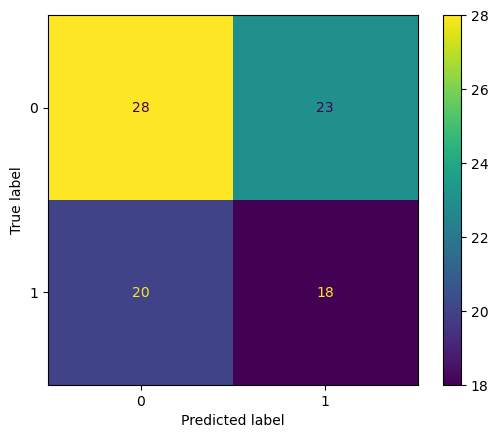

In [83]:
#docs_infra: no_execute
classes = [0, 1, 2, 3, 4]
classes = [0, 1]
cm=confusion_matrix(y_test_def2, y_pred2,labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [60]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test_def2, y_pred2, target_names=target_names, digits=4))

              precision    recall  f1-score   support

     class 0     0.5833    0.5490    0.5657        51
     class 1     0.4390    0.4737    0.4557        38

    accuracy                         0.5169        89
   macro avg     0.5112    0.5114    0.5107        89
weighted avg     0.5217    0.5169    0.5187        89



In [61]:
# model.save('modelos/modelote1203_200')  # creates a HDF5 file 'my_model.h5'

In [62]:
model.save('modelos/modelo_perfecto_{}_{}'.format(experimento,datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))) 

INFO:tensorflow:Assets written to: modelos/modelo_perfecto_LOMOS_P2yP1_GRU2_2_clasesfiltrado_50_dense_onehot_50_loss_categorical_crossentropy_lr_0.001_algoritmo_RMSprop_20240522-125340/assets


INFO:tensorflow:Assets written to: modelos/modelo_perfecto_LOMOS_P2yP1_GRU2_2_clasesfiltrado_50_dense_onehot_50_loss_categorical_crossentropy_lr_0.001_algoritmo_RMSprop_20240522-125340/assets


In [63]:
from scipy import stats
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_def)
#y_pred2 = scaler_out.inverse_transform(y_pred) #valor denormalizado

#y_pred1=y_pred[:,-1]
y_pred2=np.argmax(y_pred,axis=1)
n = len(y_pred2)
reshaped = y_pred2[:n//4*4].reshape(-1, 4)
mean_values = reshaped.mean(axis=1)

mean_values = np.round(mean_values)
mean_values = np.clip(mean_values, 0, 4)
mean_values = mean_values.astype(int)
print(mean_values)

mode_values = stats.mode(reshaped, axis=1)[0]
print(mode_values)

# Convierte los arrays a DataFrames
mean_df = pd.DataFrame(mean_values, columns=['mean'])
mode_df = pd.DataFrame(mode_values, columns=['mode'])

# Guarda los DataFrames en archivos Excel
mean_df.to_excel("clasificacion_P1P2_mean_best7.xlsx", index=False)
mode_df.to_excel("clasificacion_P1_mode_best7.xlsx", index=False)

3/3 [==============================] - 0s 23ms/step
[0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1]
[0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1]


In [64]:
print(y_pred2)

[0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1
 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0
 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0]


In [71]:
filename5 = "lomosP1_20240430_clasificado_experto.hdf"
with pd.HDFStore(filename5,complib="zlib",complevel=4) as hdf_db:
    pre_p_e2  = hdf_db.get('data/pollos_estado')
    pre_p_e2 = pre_p_e2.loc[pre_p_e2['Pollo'] != 0]
    pre_p_e2 =pre_p_e2.drop_duplicates(subset = ['Pollo', 'Medida'],  keep = 'last').reset_index(drop = True)
    t    = hdf_db.get('data/tabla')
    X_test2=np.zeros((pre_p_e2.shape[0],220,8))
    y_test2=np.zeros((pre_p_e2.shape[0],1))
    x=0
    for index, row in pre_p_e2.iterrows():   # El primer registro no se toma en cuenta porque es basura
        Primero = int(row['Primero'])
        Ultimo  = int(row['Ultimo'])
        estado  = int(row['Estado'])
        #print(Primero)
        #print(Ultimo)
        #print(estado)
        if estado == 0 or estado== 1:
           target = 1
        else:
           target = 0
        #target=estado
        pepito=np.array(t.iloc[Primero:Ultimo+1])
        # #print(pepito.shape)
        X_test2[x]=pepito[:,3:11]
        #print(X_train[x][0:4,:])       
        y_test2[x]=target
        y_test2_to_categorical = to_categorical(y_test2)
        x=x+1


# print(X_train.shape)
# print(y_train_to_categorical.shape)
# #print(X_train[0:4,:,:])
# #print(X_train[1][0:4][:])
# print(y_train[1:20])
# print(y_train_to_categorical[1:20])
# # #Aqui filtrariamos si hay filas que no nos interesan. En este caso dejo pasar todos los casos
# print(p_e)
# # X_train_filtrado = X_train[2:][:,:]
# # y_train_filtrado = y_train[2:]
X_test2_filtrado = X_test2
#y_train_filtrado = y_train
y_test2_filtrado = y_test2_to_categorical

print(X_test2_filtrado.shape)
print(y_test2_filtrado.shape)
# print(X_train_filtrado[0][:,:])
# # # Vamos a normalizar o escalar los datos
# concatenamos train y test
#X_total=np.concatenate((X_train_filtrado,X_test_filtrado),axis=0)
#scaler = MinMaxScaler(feature_range=(0, 1))
#data_2d_test = X_total.reshape(-1, X_total.shape[-1])
data_2d_test = X_test2_filtrado.reshape(-1, X_test2_filtrado.shape[-1])
normalized_data_2d_test = scaler.transform(data_2d_test)


X_test2_def=normalized_data_2d_test.reshape(X_test2_filtrado.shape) 
# la alternativa es normalizar con el total
# X_test_def=normalized_data_2d_test.reshape(X_test_filtrado.shape) 

y_test2_def=y_test2_filtrado # los valores ya estaban normalizados

print(y_test2_def.shape)

print(y_test2_filtrado)

(200, 220, 8)
(200, 2)
(200, 2)
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 

In [88]:
from scipy import stats
from sklearn.metrics import classification_report

# Crear un nuevo modelo con la misma arquitectura
best_val_model = create_model()  # Reemplaza esto con la función que usaste para crear el modelo original

# Cargar los mejores pesos
best_val_model.load_weights('best_weights.h5')

y_pred = best_val_model.predict(X_test2_def)
#y_pred2 = scaler_out.inverse_transform(y_pred) #valor denormalizado

#y_pred1=y_pred[:,-1]
y_pred2=np.argmax(y_pred,axis=1)
n = len(y_pred2)
print(n)
reshaped = y_pred2[:n//4*4].reshape(-1, 4)
mean_values = reshaped.mean(axis=1)

mean_values = np.round(mean_values)
mean_values = np.clip(mean_values, 0, 4)
mean_values = mean_values.astype(int)
print(mean_values.shape)

mode_values = stats.mode(reshaped, axis=1)[0]
print(mode_values.shape)

n = len(y_test2_def)
y_test2_def2=np.argmax(y_test2_def,axis=1)
print(y_test_def2.shape)
print(n)
reshaped2 = y_test2_def2[:n//4*4].reshape(-1, 4)
target_mean_values = reshaped2.mean(axis=1)

target_mean_values = np.round(target_mean_values)
target_mean_values = np.clip(target_mean_values, 0, 4)
target_mean_values = target_mean_values.astype(int)
print(target_mean_values.shape)

target_mode_values = stats.mode(reshaped2, axis=1)[0]
print(target_mode_values.shape)
print(reshaped)
print(mode_values)
print(target_mean_values)

7/7 [==============================] - 0s 19ms/step
200
(50,)
(50,)
(89,)
200
(50,)
(50,)
[[1 0 1 1]
 [1 1 1 1]
 [1 0 1 1]
 [0 0 1 0]
 [0 0 0 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 1 0 1]
 [0 1 0 0]
 [1 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 [0 0 1 0]
 [0 0 1 1]
 [0 0 0 0]
 [0 1 1 0]
 [0 1 0 0]
 [0 0 0 0]
 [1 1 0 0]
 [1 0 1 0]
 [0 1 0 0]
 [0 0 0 0]
 [0 1 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [1 1 0 1]
 [1 0 1 0]
 [1 0 1 1]
 [0 1 0 1]
 [0 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 1 1 0]
 [1 0 1 0]
 [0 0 0 0]
 [0 1 0 0]
 [1 0 0 1]
 [0 1 0 1]
 [1 0 0 0]
 [0 0 0 1]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [1 1 0 0]
 [1 0 1 0]
 [0 1 1 0]
 [0 1 1 1]]
[1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1]
[1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0
 1 1 1 0 1 0 1 1 0 0 1 1 0]


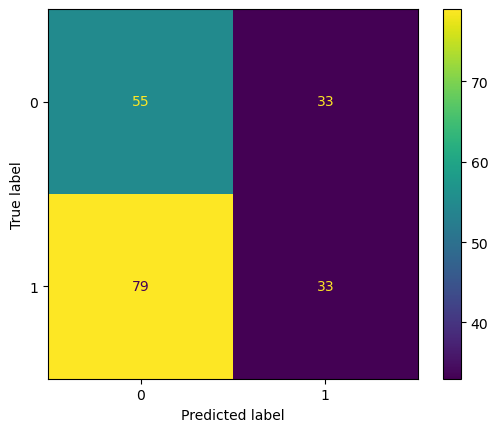

In [89]:
#docs_infra: no_execute
classes = [0, 1, 2, 3, 4]
classes = [0, 1]
cm=confusion_matrix(y_test2_def2, y_pred2,labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [68]:
print(cm.diagonal()/cm.sum(axis=1))

[1. 0.]


In [69]:
target_names = ['class 0', 'class 1']
print(classification_report(target_mean_values, mean_values, target_names=target_names, digits=4))

              precision    recall  f1-score   support

     class 0     0.4400    1.0000    0.6111        22
     class 1     0.0000    0.0000    0.0000        28

    accuracy                         0.4400        50
   macro avg     0.2200    0.5000    0.3056        50
weighted avg     0.1936    0.4400    0.2689        50



/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramete